In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df= pd.read_csv(r"C:\Users\Federico\Google Drive\Ebook\Programmazione_\Python\Jupyter\Notebook Jupyter\Adozione colture OGM\Adozione colutre OGM.csv")

In [3]:
df

,Table,Unit,Variety,Year,Attribute,Value
0,Genetically engineered (GE) corn varieties,Percent of corn planted,Insect-resistant (Bt) only ...,2000,Illinois,13
1,Genetically engineered (GE) corn varieties,Percent of corn planted,Insect-resistant (Bt) only ...,2000,Indiana,7
2,Genetically engineered (GE) corn varieties,Percent of corn planted,Insect-resistant (Bt) only ...,2000,Iowa,23
3,Genetically engineered (GE) corn varieties,Percent of corn planted,Insect-resistant (Bt) only ...,2000,Kansas,25
4,Genetically engineered (GE) corn varieties,Percent of corn planted,Insect-resistant (Bt) only ...,2000,Michigan,8
...,...,...,...,...,...,...
2935,Genetically engineered (GE) soybean varieties,Percent of all soybeans planted,All GE varieties,2020,Ohio,88
2936,Genetically engineered (GE) soybean varieties,Percent of all soybeans planted,All GE varieties,2020,South Dakota,95
2937,Genetically engineered (GE) soybean varieties,Percent of all soybeans planted,All GE varieties,2020,Wisconsin,89
2938,Genetically engineered (GE) soybean varieties,Percent of all soybeans planted,All GE varieties,2020,Other States,94


In [4]:
df.rename(columns={"Table":"Crop", "Attribute":"State"},inplace=True)
df.drop(columns="Unit",inplace=True)

In [5]:
df

,Crop,Variety,Year,State,Value
0,Genetically engineered (GE) corn varieties,Insect-resistant (Bt) only ...,2000,Illinois,13
1,Genetically engineered (GE) corn varieties,Insect-resistant (Bt) only ...,2000,Indiana,7
2,Genetically engineered (GE) corn varieties,Insect-resistant (Bt) only ...,2000,Iowa,23
3,Genetically engineered (GE) corn varieties,Insect-resistant (Bt) only ...,2000,Kansas,25
4,Genetically engineered (GE) corn varieties,Insect-resistant (Bt) only ...,2000,Michigan,8
...,...,...,...,...,...
2935,Genetically engineered (GE) soybean varieties,All GE varieties,2020,Ohio,88
2936,Genetically engineered (GE) soybean varieties,All GE varieties,2020,South Dakota,95
2937,Genetically engineered (GE) soybean varieties,All GE varieties,2020,Wisconsin,89
2938,Genetically engineered (GE) soybean varieties,All GE varieties,2020,Other States,94


In [6]:
df.Value=pd.to_numeric(df.Value, errors="coerce")
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2832 entries, 0 to 2939
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Crop     2832 non-null   object 
 1   Variety  2832 non-null   object 
 2   Year     2832 non-null   int64  
 3   State    2832 non-null   object 
 4   Value    2832 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.8+ KB


In [8]:
df["Value"]= df["Value"].astype("int",errors="ignore")

In [9]:
df["Value"] = pd.to_numeric(df["Value"], errors="coerce")
df["Value"].isnull().sum()

0

In [10]:
df.dropna(inplace=True)
df.isnull().sum()

Crop       0
Variety    0
Year       0
State      0
Value      0
dtype: int64

In [11]:
#Dataframe now clean from non numeric values in value and year columns

In [12]:
df.Variety.value_counts()

All GE varieties                                                         542
Insect-resistant (Bt) only                                               542
Herbicide-tolerant only                                                  542
All GE varieties                                                         336
Herbicide-tolerant only                                                  336
Stacked gene varieties                                                   297
Stacked gene varieties                                                   237
Name: Variety, dtype: int64

In [13]:
df=df[~df.Variety.str.contains("All GE")]


In [14]:
df=df[~df.Variety.str.contains("Stacked")]


In [15]:
df.Variety.value_counts()

Insect-resistant (Bt) only                                               542
Herbicide-tolerant only                                                  542
Herbicide-tolerant only                                                  336
Name: Variety, dtype: int64

In [16]:
df['Variety'] = df['Variety'].str.strip()

In [17]:
df.Variety.value_counts(normalize=True)

Herbicide-tolerant only       0.61831
Insect-resistant (Bt) only    0.38169
Name: Variety, dtype: float64

In [18]:
df.Crop.value_counts()

Genetically engineered (GE) corn varieties             610
Genetically engineered (GE) upland cotton varieties    474
Genetically engineered (GE) soybean varieties          336
Name: Crop, dtype: int64

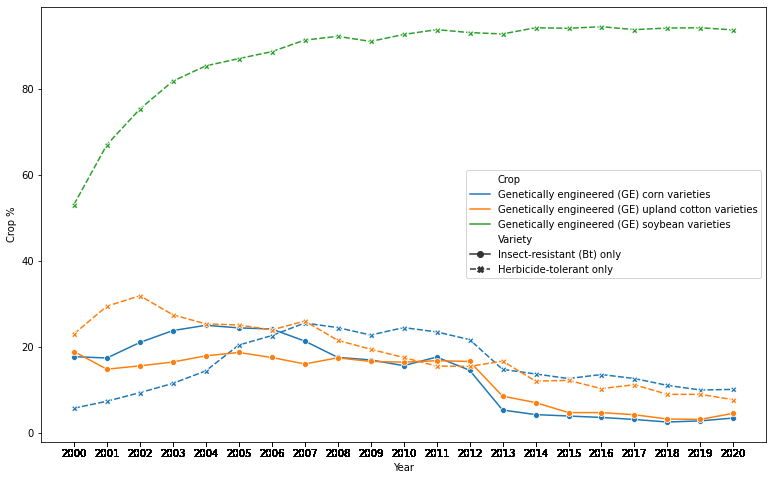

In [19]:
#Visualize the prevalent crop chosen over the years
plt.figure(figsize=(13,8))
sns.lineplot(x=df.Year, y= df.Value, hue=df.Crop, ci=None, style=df.Variety, markers=True)
plt.ylabel("Crop %")
plt.xticks(df.Year)
plt.show()

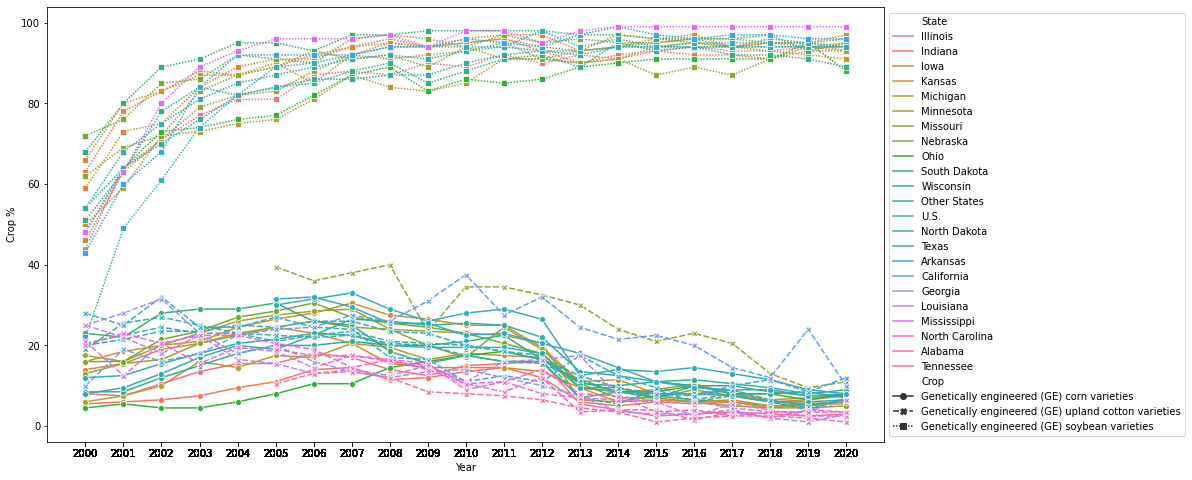

In [20]:
#Visualize the adoption of the 3 crops in all the different states
plt.figure(figsize=(15,8))
sns.lineplot(x=df.Year, y= df.Value, hue=df.State, ci=None, style=df.Crop, markers=True)
plt.ylabel("Crop %")
plt.xticks(df.Year)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [21]:
#Wow, that is a clustered graph, let's break it down to make it easier to visualize the different adoptions across the states

In [22]:
df.Crop.unique()

array(['Genetically engineered (GE) corn varieties',
       'Genetically engineered (GE) upland cotton varieties',
       'Genetically engineered (GE) soybean varieties'], dtype=object)

In [23]:
#Create a different dataframe for each crop
dfcorn=df.loc[df.Crop=="Genetically engineered (GE) corn varieties"]
dfcotton=df.loc[df.Crop=="Genetically engineered (GE) upland cotton varieties"]
dfsoy=df.loc[df.Crop=="Genetically engineered (GE) soybean varieties"]


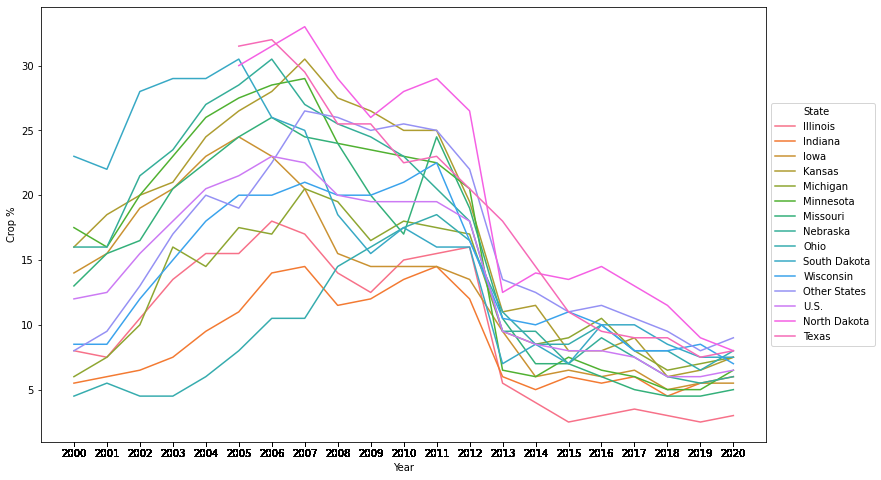

In [24]:
plt.figure(figsize=(13,8))
sns.lineplot(x=dfcorn.Year, y=dfcorn.Value, hue=dfcorn.State, ci=None)
plt.xticks(df.Year)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Crop %")
plt.show()


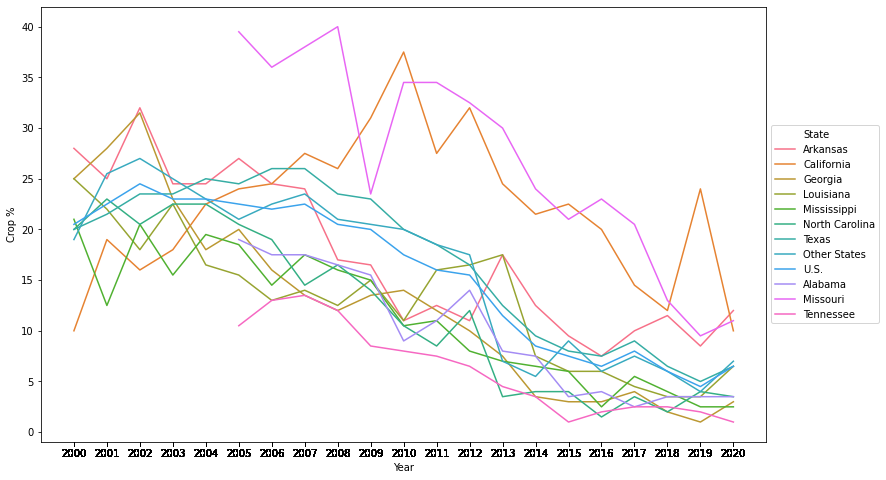

In [25]:
plt.figure(figsize=(13,8))
sns.lineplot(x=dfcotton.Year, y=dfcotton.Value, hue=dfcotton.State,ci=None)
plt.xticks(df.Year)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Crop %")
plt.show()


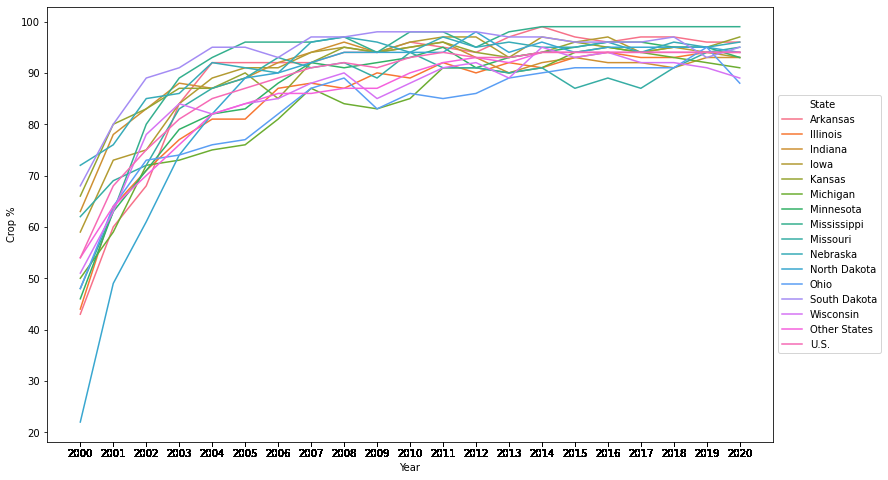

In [26]:
plt.figure(figsize=(13,8))
sns.lineplot(x=dfsoy.Year, y=dfsoy.Value, hue=dfsoy.State,ci=None)
plt.xticks(df.Year)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Crop %")
plt.show()


In [27]:
"""The situation is much clearer, we can clearly see a massive drop in the production of genetically modified corn from 2012-2013 and a continuous downward trend in cotton production.
Soybean, on the other hand, shows a completely opposite behavior, increasing its cultivation exponentially in the early 2000s to settle on values over 80% until today."""

'The situation is much clearer, we can clearly see a massive drop in the production of genetically modified corn from 2012-2013 and a continuous downward trend in cotton production.\nSoybean, on the other hand, shows a completely opposite behavior, increasing its cultivation exponentially in the early 2000s to settle on values over 80% until today.'

In [28]:
"""Let's now see the general adoption of all 3 different seeds in the different states, without worrying about dividing them into groups again.
The ideal graph for this purpose is a heat map, but to use it we need to transform the dataframe into a horizontal table using either a groupby function or the construction of a pivot table."""

"Let's now see the general adoption of all 3 different seeds in the different states, without worrying about dividing them into groups again.\nThe ideal graph for this purpose is a heat map, but to use it we need to transform the dataframe into a horizontal table using either a groupby function or the construction of a pivot table."

In [29]:
dfpivot= df.pivot_table(index=df.Year, columns=df.State)

In [30]:
#Replace nan values with 0s
dfpivot=dfpivot.fillna(0)

In [31]:
dfpivot

Value                                                                 \
State Alabama   Arkansas California Georgia   Illinois    Indiana       Iowa   
Year                                                                           
2000      0.0  33.000000       10.0    25.0  20.000000  24.666667  29.000000   
2001      0.0  36.666667       19.0    28.0  26.333333  30.000000  34.666667   
2002      0.0  44.000000       16.0    31.5  30.666667  32.000000  37.666667   
2003      0.0  44.333333       18.0    23.0  34.666667  34.333333  41.666667   
2004      0.0  47.000000       22.5    18.0  37.333333  35.333333  45.000000   
2005     19.0  48.666667       24.0    20.0  37.333333  37.000000  46.666667   
2006     17.5  47.000000       24.5    16.0  41.000000  40.000000  45.666667   
2007     17.5  46.666667       27.5    13.5  40.666667  41.000000  45.000000   
2008     16.5  42.666667       26.0    12.0  38.333333  39.666667  42.000000   
2009     15.5  42.333333       31.0    13.5  38.333333  39.333333  41.000000   
2010      9.0  39.333333       37.5    14.0  39.666667  40.666667  41.666667   
2011     11.0  40.000000       27.5    12.0  41.000000  41.666667  42.000000   
2012     14.0  38.666667       32.0    10.0  40.666667  39.000000  41.333333   
2013      8.0  44.000000       24.5     7.5  34.333333  34.000000  37.333333   
2014      7.5  41.333333       21.5     3.5  33.000000  34.000000  36.333333   
2015      3.5  38.666667       22.5     3.0  32.666667  35.000000  36.333333   
2016      4.0  37.000000       20.0     3.0  33.333333  34.333333  36.333333   
2017      2.5  39.000000       14.5     4.0  33.333333  34.666667  35.666667   
2018      3.5  40.000000       12.0     2.0  33.000000  33.333333  35.000000   
2019      3.5  37.666667       24.0     1.0  33.000000  34.666667  35.000000   
2020      3.5  40.000000       10.0     3.0  33.333333  35.000000  34.666667   

                                       ...                            \
State     Kansas Louisiana   Michigan  ...   Nebraska North Carolina   
Year                                   ...                             
2000   32.666667      25.0  20.666667  ...  34.666667           20.0   
2001   39.000000      22.0  24.666667  ...  36.000000           23.0   
2002   41.000000      18.0  30.666667  ...  42.666667           20.5   
2003   43.000000      22.5  35.000000  ...  44.333333           22.5   
2004   45.333333      16.5  34.666667  ...  48.666667           22.5   
2005   47.666667      15.5  37.000000  ...  49.333333           20.5   
2006   47.000000      13.0  38.333333  ...  50.333333           19.0   
2007   51.000000      14.0  42.666667  ...  50.000000           14.5   
2008   50.000000      12.5  41.000000  ...  49.333333           16.5   
2009   49.000000      15.0  38.666667  ...  48.333333           14.0   
2010   48.333333      11.0  40.333333  ...  46.666667           10.5   
2011   48.666667      16.0  42.000000  ...  46.000000            8.5   
2012   44.333333      16.5  41.666667  ...  43.666667           12.0   
2013   38.333333      17.5  36.333333  ...  38.333333            3.5   
2014   39.000000       7.5  36.000000  ...  38.000000            4.0   
2015   37.333333       6.0  37.333333  ...  36.333333            4.0   
2016   37.000000       6.0  38.666667  ...  38.000000            1.5   
2017   37.333333       4.5  36.666667  ...  36.333333            3.5   
2018   35.666667       3.5  35.333333  ...  36.000000            2.0   
2019   36.000000       3.5  35.333333  ...  35.333333            4.0   
2020   37.333333       6.5  35.333333  ...  36.000000            3.5   

                                                                          \
State North Dakota       Ohio Other States South Dakota Tennessee  Texas   
Year                                                                       
2000     22.000000  19.000000         21.6    38.000000       0.0  20.00   
2001     49.000000  25.000000         26.8    41.33333

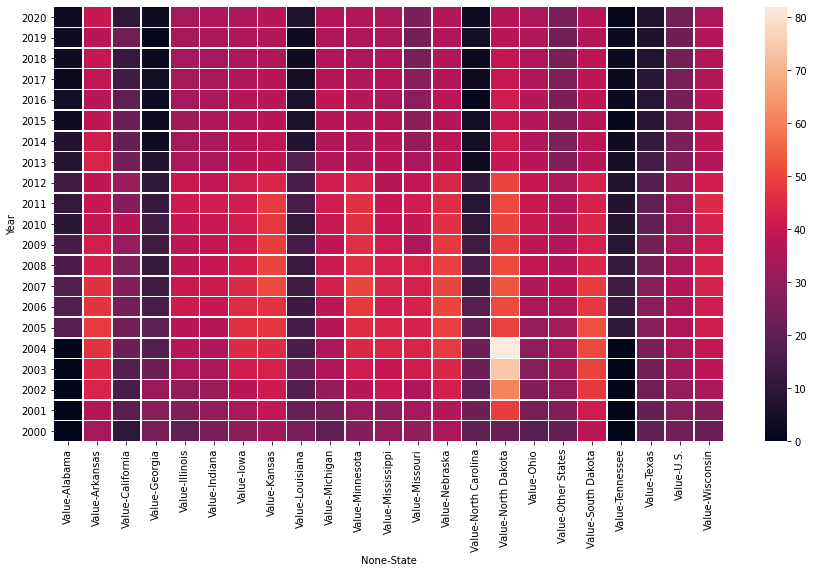

In [32]:
plt.figure(figsize=(15,8))
ax = sns.heatmap(data=dfpivot.sort_index(ascending=False), linewidths=.5)
plt.show()

In [33]:
"""The heatmap graph allows us to see where most of the GM crops are grown: while there are no extreme upper values (as this takes the mean of the crops)
We can easily see where little or almost no GMO crops have been adopted.
Curiously, with the exception of California, all other states with critically low values are located in the south of the country."""

'The heatmap graph allows us to see where most of the GM crops are grown: while there are no extreme upper values (as this takes the mean of the crops)\nWe can easily see where little or almost no GMO crops have been adopted.\nCuriously, with the exception of California, all other states with critically low values are located in the south of the country.'